# Assignment 7
### Do any five.

## 1. 

- What is the expected value of a single die roll? 
- What is the expected value of rolling two dice and adding the results together?
- What is the expected winnings of any gamble in European roulette?

- Imagine you roll a die, and you record the value you get. But, if you roll a six, you roll again, and add that value. What is the expected value?
- Imagine that the process described in the last question continues until you fail to roll a six. What is the expected value of the process? (This can be tricky, you can simulate it to get an answer if you prefer. Hint: The answer is 4.2.)

- $E[X] = (1 + 2 + 3 + 4 + 5 + 6) / 6 = 3.5$
- $E[X_1 + X_2]$ = $E[X_1] + E[X_2] = 3.5 + 3.5 = 7$

European Roulette: 37 pockets 
- E[X] = -1 * $36/37$ + $35/37$ = $-1/37$ or ~$-0.027$

- $E[X] = \sum_{k=1}^{5} k * \frac{1}{6} + \frac{1}{6}E[6 + \text{second roll}]$ 

= (1 + 2 + 3 + 4 + 5 ) / 6  = 2.5 
+ $E[6 + second roll] = (E[6] + E[second roll]) / 6 = (6 + 3.5) / 6 = 19 / 12$
 = 19 / 12 + 2.5 = 49 / 12


In [3]:
import random
import numpy as np

def roll(): 
    sum = 0 
    while True:
        die = random.randint(1, 6)

        sum += die

        if die != 6: 
            return sum

sim = 1000000

results = [roll() for i in range(sim)]
print(np.mean(results))

4.195845


## 2. 
- Compute the expected value for a uniform random variable.
- Show that $\mathbb{E}[a+bX] = a + b\mathbb{E}[X]$
- Show, by example, that $v(\mathbb{E}[X]) \neq \mathbb{E}[v(X)]$, if $v(x) \neq a+bx$. For example, try $v(y) = y^2$ or $v(y)=\sqrt{y}$ with a Bernoulli or uniform or normally distributed random variable. This can be an important thing to remember: The expectation of a transformed random variable is not the transformation of the expected value.

$f_X(x) = \frac{1}{b-a} \qquad and \qquad a \le x \le b$

$E[X] = \int_a^b x * \frac{1}{b-a}\,dx$ = $\frac{1}{b-a} \left[ \frac{x^2}{2} \right]_a^b $ = $\frac{b^2 - a^2}{2(b-a)}$ = $\frac{a +b}{2}$

by definition E[a+bX]=E[a]+E[bX]=a+bE[X], which can also be reflected through integration where $ \int_{-\infty}^{\infty} (a + bx)f(x)dx = \int_{-\infty}^{\infty}$ eventually breaks down into $ a\int_{-\infty}^{\infty} f(x)dx + b\int_{-\infty}^{\infty} xf(x)dx $ which we can see as  $ a+ bE[X]$

lets try $v(x) = x^2$ with X ~ U(0,1)

$v(E[X])$ where $E[X] = \int_0^1 x dx$ = 1/2, $v(E[X]) = $E[X]^2 = (\frac{1}{2})^2 = \frac{1}{4}$

$E[X^2]$ = $\int_0^1 x^2 dx$ = $\left[ \frac{x^3}{3} \right]_0^1$ = 1/3

## 3. 
- Compute the variance for a uniform random variable.
- Show that 
$$
\mathbb{V}[X] = \mathbb{E}[X^2] - \mathbb{E}[X]^2
$$
$$
\mathbb{V}[a+bX] = b^2 \mathbb{V}[X]
$$
- Show that if $X$ is a normally distributed random variable, then $a + bX$ is distributed normally with mean $a+ b \mathbb{E}[X]$ and variance $b^2 \sigma_X^2$ 

These properties get used all the time!


Variance for Uniform RV is $\mathbb{E}[X^2] - \mathbb{E}[X]^2$ where we calculated in Problem 2 $\mathbb{E}[X] = \frac{a + b}{2}$, so $\mathbb{E}[X]^2$ = $(\frac{a +b}{2})^2$

We can also solve for $\mathbb{E}[X^2]$, where $E[X^2] = \int_a^b x^2 * \frac{1}{b-a}\,dx$ = $\frac{1}{b-a} * \left[ \frac{x^3}{3} \right]_a^b$ = $\frac {b^3-a^3}{3(b-a)}$ = $\frac {b^2 + ab + a^2}{3}$

Thus, $Var(X)$ = $\frac {b^2 + ab + a^2}{3}$ - $(\frac{a +b}{2})^2$ = $\frac{b^2 + ab + a^2}{3}$ - $\frac {a^2 + 2ab + b^2}{4}$

= $\frac{4b^2+4ab+4a^2−3a^2−6ab−3b^2}{12}$ = $\frac{b^2−2ab+a^2}{12}$ = $\frac{(b-a)^2}{12}$

given that the definition of Var(X) = E[(X−E[X])^2]

$Var(X)$ = $E[X^2−2X * E[X]+E[X]^2]$

, using the formulas for linearity where E(E(X)^2) = E(X)^2 and subtituting E[2X * E[X]] = 2 E[X] E[X]

we get $Var(X)$ = $E[X^2]−2E[X]^2+E[X]^2=E[X^2]−E[X]^2$

starting again where $Var(Y)=E[(Y - E[Y])^2]$ and $E[Y]=a + bE[X]$

$Y−E[Y]$ = $(a + bX) - (a + bE[X])=b(X - E[X])$

and thus, $Var(Y)$ = $E[b^2(X - E[X])^2] = b^2E[(X - E[X])^2]=b^2 * Var(X)$

Show that if $X$ is a normally distributed random variable, then $a + bX$ is distributed normally with mean $a+ b \mathbb{E}[X]$ and variance $b^2 \sigma_X^2$ 

given $ f_X(x) = \frac{1}{\sqrt{2\pi}\,\sigma} \exp\!\left( -\frac{(x - \mu)^2}{2\sigma^2} \right) $

and that we want $f_Y(y)$, we can rewrite Y = a + bX as X = (y - a) / b

so, $f_Y(y)$ = $f_X((y - a) / b)$ * dx / dy = $f_Y(y) = 1 / abs(b) * f_X((y - a) / b)$

= $f_Y(y)$ = $\frac {1}{abs(b)}\frac{1}{\sqrt{2\pi}\,\sigma} \exp\!\left( -\frac{(\frac{y-a}{b} - \mu)^2}{2\sigma^2} \right) $

inside the exponent we get $(\frac {y - (a + b\mu)}{b})^2$, which witht he rest of the exponent gets you $- \frac {(y -(a +  b\mu))^2}{2b^2\sigma^2}$

and in front, we get $1 / (abs(b) * \sqrt{2\pi}\,\sigma)$ = $ 1 / (\sqrt{2\pi}\ * \sqrt{b^2\sigma^2})$ as we square the original absolute value 

this means all together we get $f_Y(y) = \frac {1}{\sqrt{2\pi}\ * \sqrt{b^2\sigma^2}} \exp\!\left( -\frac {(y -(a +  b\mu))^2}{2b^2\sigma^2} \right) $
which is the pdf of the new normal distirbution for Y with mean a + $b\mu$ and variance $b^2\sigma^2$

and we can conclude that Y = a + bX and ~ $N(a + b\mu, b^2\sigma^2)$

## 4.

- The **covariance** of $X$ and $Y$ is
$$
\text{cov}(X,Y) = \int_{y} \int_{x} (x-\mathbb{E}[X])(y-\mathbb{E}[Y])f_{XY}(x,y) dxdy = \mathbb{E}_{XY}[ (x-\mu_X)(y-\mu_Y)]
$$
- Show that if $f_{XY}(x,y)=f_X(x)f_Y(y)$, then $\text{cov}(X,Y)=0$
- Provide an example (computation/simulation is fine) where $\text{cov}(X,Y)\approx 0$ but $f_{XY}(x,y)\neq 0$
- The covariance doesn't characterize joint random variables except in a few special cases: The covariance only captures the **linear** association between the two variables, not nonlinear associations.

## 5. 

Suppose $X$ has an expectation $\mathbb{E}[X]<\infty$ and variance $\mathbb{V}[X]<\infty$; this isn't always true, but is *usually* true
- Consider making a new variable, $\varepsilon = X - \mathbb{E}[X]$
- What's the expectation of $\varepsilon$?
- What's the variance of $\varepsilon$?
- So we can write any random variable in the form $X = \mathbb{E}[X] + \varepsilon, $ where $\mathbb{E}[\varepsilon]=0$ and $\mathbb{V}[\varepsilon] = \sigma_X^2$
- If that's true, show that we can also write any random variable in the form $X = \mathbb{E}[X] + \sigma_X \varepsilon$, where $\mathbb{E}[\varepsilon]=0$ and $\mathbb{V}[\varepsilon]=1$
- Now replace $\mathbb{E}[X]$ with $x\beta$, and the stage is set for regression models

- $E[\varepsilon]$ = $E[X - E[X]]$ = $E[X] - \mathbb{E}[X] = 0$
- $V[\varepsilon]$ = $V[X - E[X]]$ = $V[X]$ since E[X] is constant and thus doesn't change variance = $\sigma_X^2$
- by definition for $\varepsilon$, X = E[X] + $\varepsilon$ where E[$\varepsilon$] = 0 and V[$\varepsilon$] = $\sigma_X^2$

define $\varepsilon'$ as $\varepsilon$ / $\sigma_X$, then E[$\varepsilon'$] = 0 and V[$\varepsilon'$] = 1 where we can subtitute $\varepsilon'$ = $\sigma_X$ * $\varepsilon'$ into X with X = E[X] + $\sigma_X$ * $\varepsilon'$, thus any random variable can be written as its mean + SD * standard error term 

where X = E[X] + $\sigma_X$ * $\varepsilon'$ and thus E[X] = E[E[X]] + E[$\sigma_X$ * $\varepsilon'$] which simplifies to 0 on the right side and thus just E[X] and for Var(X), the story is the same, where V[X] = $\int \left(E[X] + \sigma_X\varepsilon - E[X] + \sigma_X * E[\varepsilon]\right)^2 f(x)dx$ which breaks down to $\int \sigma_X^2 (\varepsilon - E[\varepsilon])^2 f(x)dx$ which is V[$\varepsilon$] * $\sigma_X^2$ as the $\sigma_X^2$ moves to the outside and also retains the same like the expectation 

replacing E[X] with $x*\beta$ gives Y = $x*\beta$ + $\sigma_X$ * $\varepsilon'$ where E[$\varepsilon'$] = 0 and V[$\varepsilon'$] = 1, we ahve the standard formula Y = $x*\beta$ + $\sigma**\varepsilon'$ with $\varepsilon$ with mean 0 and variance 1. This gives us Y = mean + any noise, which is the same thing as the distirbution of Y we explored earlier in parts of Question 5. 

## 6.
- Use the Taylor series expansions 
$$
F(x+h) = F(x) + hf(x) + \frac{h^2}{2}f'(x) + O(h^3)
$$ 
and 
$$
F(x-h) = F(x) - h f(x) + \frac{h^2}{2} f'(x)+ O(h^3)
$$
to show that
$$
\mathbb{E}[\hat{f}_{X,h}(x)] = \frac{F(x+h)-F(x-h)}{2h} = f(x) + O(h^2),
$$
so the **bias** of the KDE is $O(h^2)$, unlike the ECDF, for which $\mathbb{E}[\hat{F}(x)] = F(x)$.

## 7.
- Suppose $X$ and $Y$ are distributed bivariate normal. Show that if $\rho=0$, then $X$ and $Y$ are independent.
- For the multivariate normal, show that if $\Sigma$ is a diagonal matrix, then $X_1, X_2, ..., X_n$ are independent.
- For the multivariate normal, show that if $\Sigma$ is a diagonal matrix and all the $\sigma_i^2$ and all the $\mu_i$ are equal, then $X_1, X_2, ..., X_n$ are independently distributed random variables with distribution $N(\mu, \sigma^2)$

## 8.
- Open the METABRIC data. Make a histogram of 'Ratio Therapy'.
- Let treatment, $T$ be distributed binomial with parameter $p$. Then the contribution to the likelihood for each patient $i$, with $y_i = 0$ for no radiation therapy and $y_i=1$ for radiation therapy, is 
$$
p^{y_i}(1-p)^{1-y_i}
$$
- Write out the likelihood.
- Maximize the likelihood with respect to $p$. What is the MLE, $\hat{p}$?
- Bootstrap the sampling density/distribution of $\hat{p}$.

In [6]:
import pandas as pd 
import seaborn as sns
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

data = pd.read_csv('metabric.csv')

data.head()

,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Chemotherapy,Hormone Therapy,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Overall Survival Status,Radio Therapy,TMB (nonsynonymous),Tumor Size,Tumor Stage
0,43.19,BREAST CONSERVING,Breast Cancer,NO,YES,0.0,2.0,4.020,84.633333,0:LIVING,YES,2.615035,10.0,1.0
1,48.87,MASTECTOMY,Breast Cancer,YES,YES,1.0,2.0,4.030,163.700000,1:DECEASED,NO,2.615035,15.0,2.0
2,47.68,MASTECTOMY,Breast Cancer,YES,YES,3.0,1.0,4.050,164.933333,0:LIVING,YES,1.307518,25.0,2.0
3,76.97,MASTECTOMY,Breast Cancer,YES,YES,8.0,2.0,6.080,41.366667,1:DECEASED,YES,2.615035,40.0,2.0
4,78.77,MASTECTOMY,Breast Cancer,NO,YES,0.0,4.0,4.062,7.800000,1:DECEASED,YES,5.230071,31.0,4.0


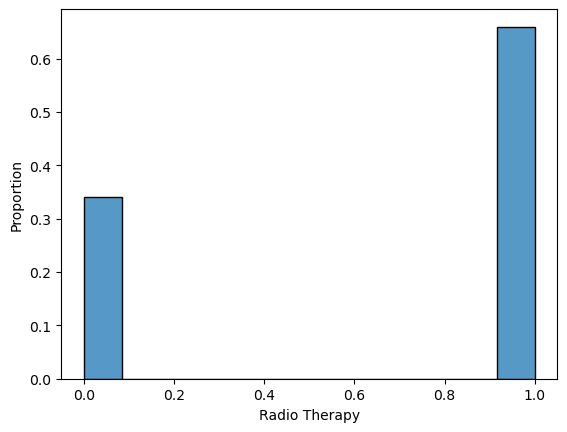

In [7]:
y = data['Radio Therapy']

y = y.replace({'YES':'1.0', 'NO':'0.0'})
y = pd.to_numeric(y,errors='coerce')

sns.histplot(y,stat='proportion')
plt.show()

In [12]:
y.sum()


np.float64(886.0)

In [14]:
len(y) - y.sum()

np.float64(457.0)

Likelihood is L(p) = $\prod_{i=1}^{n} p^{y_i}(1-p)^{1-y_i}$

where maximizing for the MLE you take the log to get $l(p) = \sum_{i=1}^{n} y_i \log(p) + (1 - y_i) \log(1 - p)$ and the derivative, which is $l'(p) = \sum_{i=1}^{n} y_i \frac{1}{p} - (1 - y_i) \frac{1}{1 - p}$

together $\sum_{i=1}^{n} y_i \frac{1}{\hat{p}} = (1 - y_i) \frac{1}{1 - \hat{p}} $ and thus $\hat{p} = \frac{1}{n} \sum_{i=1}^{n} y_i$

In [9]:
phat = y.sum() / len(y)
phat

np.float64(0.659717051377513)

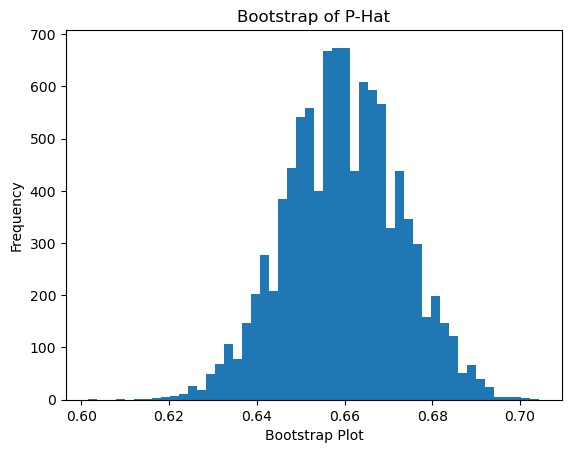

In [16]:
n = len(y)

num = 10000
boot = np.zeros(num)

np.random.seed(42)


for i in range(num):
    sample = np.random.choice(n, size = n, replace = True)
    y_sample = y.iloc[sample]
    boot[i] = y_sample.mean()

plt.hist(boot, bins=50)
plt.xlabel("Bootstrap Plot")
plt.ylabel("Frequency")
plt.title("Bootstrap of P-Hat")
plt.show()

## 9.
- Open the Ames house price data. Make a KDE of 'price'. Select an appropriate distribution for modeling it, and explain why you selected it. (Hint: You might want to take a common transformation of price.)
- Derive the density for this distribution.
- Write out the likelihood.
- Maximize the likelihood. What is the MLE?
- Plot the density/distribution for your fitted model and compare it to the KDE/ECDF. Criticize the fit.
- Bootstrap the sampling density/distribution of your parameters.

## 10.
- Open the METABRIC data. Make a KDE of 'Overall Survival (Months)'.
- Let survival time, $T$ be distributed exponentially with parameter $\lambda$. Then its distribution is
$$
F(t) = 1 - e^{-\lambda t} = p[T\le t].
$$
- Derive the density for this distribution.
- Write out the likelihood.
- Maximize the likelihood with respect to $\lambda$. What is the MLE, $\hat{\lambda}$?
- Plot the density/distribution for your fitted model and compare it to the KDE/ECDF. Criticize the fit.
- Bootstrap the sampling density/distribution of $\hat{\lambda}$.

## 11.
- Open the Ames house price data. Make a histogram of 'TotRms.AbvGrd', or total rooms above ground.
- We're going to model this using the Poisson Distribution. The probability that $y_i = k$ is given by
$$
pr[y_i = k ] = \frac{ \lambda^k e^{-\lambda} }{k!}
$$
- Write out the likelihood.
- Maximize the likelihood. What is the MLE? (Hint: The sample mean. As usual.)
- Plot the density/distribution for your fitted model and compare it to the KDE/ECDF. Criticize the fit.
- Bootstrap the sampling density/distribution of your parameter.

## 12.
- Open the METABRIC data. Make a histogram of 'Mutation Count' with around 50 bins. Let $Y$ be the mutation count the random variable, and $y_i$ the mutation count for patient $i$.
- We're going to model this using the Poisson Distribution. The probability that $y_i = k$ is given by
$$
pr[y_i = k ] = \frac{ \lambda^k e^{-\lambda} }{k!}
$$
- Write out the likelihood.
- Maximize the likelihood. What is the MLE? (Hint: The sample mean. As usual.)
- Plot the density/distribution for your fitted model and compare it to the KDE/ECDF. Criticize the fit.
- Bootstrap the sampling density/distribution of your parameter.